## M2 T01: Visualització gràfica d'un dataset
### Exercici 1
##### Resumeix gràficament el data set DelayedFlights.csv

##### Crea almenys una visualització per:
1. Una variable categòrica (UniqueCarrier)
2. Una variable numèrica (ArrDelay)
3. Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
4. Dues variables numèriques (ArrDelay i DepDelay)
5. Tres variables (ArrDelay, DepDelay i UniqueCarrier)
6. Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

### Exercici 2

##### Exporta els gràfics com imatges o com html.

### Exercici 3

##### Integra les visualitzacions gràfiques, en la tasca 2, del Mòdul 1.

##### Per no haver de tornar a condicionar el Data Frame, s'agafa el .csv exportat a la M1T02 i s'utilitzarà la variable _TailNum_, que també és categòrica, enlloc de _UniqueCarrier_, que no es va agafar en el seu moment.

In [1]:
import pandas as pd
df = pd.read_csv('m1t02.csv')

In [2]:
# EXERICI 1.1 - Crear una visualització per una variable categòrica
endarreriments = df[['TailNum','ElapsedTimeDelay']]

In [3]:
mitjana_endarreriments = endarreriments.groupby('TailNum').ElapsedTimeDelay.mean()
df_me = mitjana_endarreriments.to_frame().sort_values(['ElapsedTimeDelay'], ascending=0)[:4]
df_me 

,ElapsedTimeDelay
TailNum,
N220UA,33.800000
N172DZ,28.500000
N169DZ,23.000000
N194DN,22.666667


In [4]:
df_me['TailNum'] = df_me.index #S'afegeix l'índex com a dada
df_me #aquestes són les dades a representar

,ElapsedTimeDelay,TailNum
TailNum,,
N220UA,33.800000,N220UA
N172DZ,28.500000,N172DZ
N169DZ,23.000000,N169DZ
N194DN,22.666667,N194DN


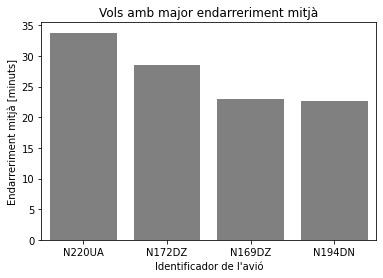

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
fig1 = plt.figure()
plot1 = sns.barplot(x='TailNum', y='ElapsedTimeDelay',data=df_me,color='grey')
plot1.set_title('Vols amb major endarreriment mitjà')
plot1.set_ylabel('Endarreriment mitjà [minuts]'); plot1.set_xlabel('Identificador de l\'avió');
plt.savefig('fig1_.png')

In [6]:
# EXERCICI 1.2 - Crear una visualització per una variable numèrica
delay_setmana = df[['DayOfWeek','ArrDelay']]
delay_setmana.head() #aquestes són les dades a representar

,DayOfWeek,ArrDelay
0,7,244.0
1,1,85.0
2,4,39.0
3,1,78.0
4,2,70.0


In [7]:
delay_setmana.max()# per

DayOfWeek       7.0
ArrDelay     2461.0
dtype: float64

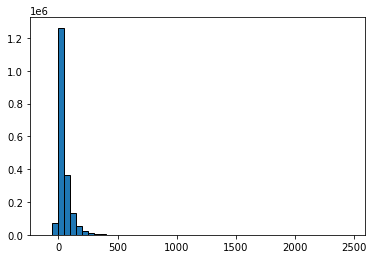

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.hist(delay_setmana['ArrDelay'],bins=50, edgecolor='black');
plt.savefig('fig21_.png')
#plt.show()

##### Sent un histograma de les dades d'Endarreriment en l'arribada, l'eix y ens mostra la freqüència dels endarreriments del conjunt de dades, en l'eix x. La majoria d'endarreriments (> 1.2M de registres) són positius majors a zero i el gràfic arriba fins 2500 (minuts), per incloure l'endarreriment més gra, que hem vist que era de 2461 minuts. 
##### Es pot fer el mateix anàlisi per diversos dies de la setmana:

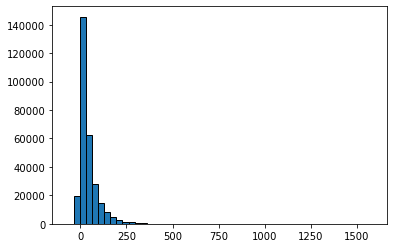

In [9]:
dilluns = delay_setmana.groupby('DayOfWeek').get_group(1)
plt.hist(dilluns['ArrDelay'],bins=50, edgecolor='black');
plt.savefig('fig22_.png')

##### En aquest cas, la freqüència màxima és més petita, ja que només estem agafant una part de les dades, i l'endarreriment màxim també es menor. Es podria dir que el dilluns no és el dia de la setmana amb més endarreriments.
##### Per últim, amb aquest subconjunt de dades, també es pot analitzar quina quantitat de registres correspon a cada dia de la setmana:

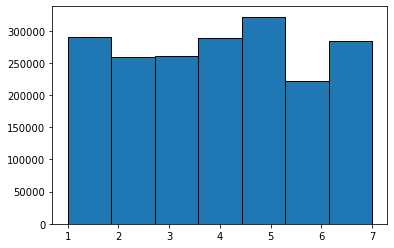

In [10]:
plt.hist(delay_setmana['DayOfWeek'],bins=7, edgecolor='black');
plt.savefig('fig23_.png')

##### En aquest cas, el diagrama és bastant simètric i en l'eix horitzontal només hi ha 7 classes, corresponents als 7 dies de la setmana. 

In [11]:
# EXERCICI 1.3 -  Crear una visualització per una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
import pandas as pd
data_frame = pd.read_csv('DelayedFlights.csv')
data_frame = data_frame[['UniqueCarrier','ArrDelay']]
data_frame = data_frame.dropna()
data_frame.head()

,UniqueCarrier,ArrDelay
0,WN,-14.0
1,WN,2.0
2,WN,14.0
3,WN,34.0
4,WN,11.0


##### Finalment, en aquest apartat s'opta per rescatar la variable _UniqueCarrier_  ja que en tenir només 20 elements diferents es pot utilitzar millor per representar el conjunt gràficament.

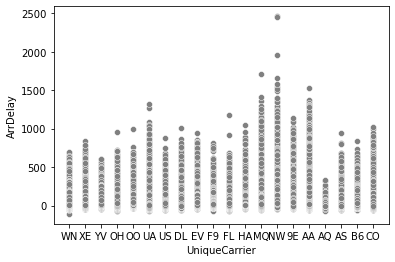

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = 'UniqueCarrier', y = 'ArrDelay', data = data_frame, color = 'grey')
plt.savefig('fig3_.png')

##### Nota: he provat de fer boxplots amb les mateixes dades, però no aporten molta informació perquè els quartils són molt estrets, pràcticament només idiquen la mitjana.

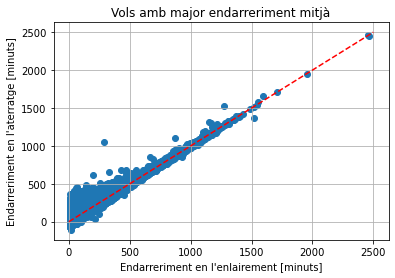

In [13]:
# EXERCICI 1.4 - Crear una visualització per dues variables numèriques (ArrDelay i DepDelay)
ad_delay = df[['DepDelay','ArrDelay']]# Dades a representar

fig4 = plt.figure()
plot4 = fig4.add_subplot(111)
plot4.scatter(df['DepDelay'],df['ArrDelay'])
plot4.plot([0,2500],[0,2500],c='r',linestyle='dashed')
plot4.set_title('Vols amb major endarreriment mitjà'); plot4.grid()
plot4.set_xlabel('Endarreriment en l\'enlairement [minuts]'); plot4.set_ylabel('Endarreriment en l\'aterratge [minuts]');
plt.savefig('fig4_.png')

##### Amb això s'observa que hi ha una tendència a un major endarreriment en l'aterratge que en l'enlairement. S'ha de tenir en compte els histogrames realitzats anteriorment, ja que en aquest gràfic els punts queden solapats i no se n'observa la densitat.

In [14]:
# EXERCICI 1.5 - Crear una visualització per tres variables (ArrDelay, DepDelay i UniqueCarrier)
import pandas as pd
data_frame = pd.read_csv('DelayedFlights.csv')
g5 = data_frame[['UniqueCarrier','ArrDelay','DepDelay']].dropna().groupby('UniqueCarrier')

In [15]:
AD_mean = g5.ArrDelay.mean().to_frame() #ArrDelay
DD_mean = g5.DepDelay.mean().to_frame() #DepDelay

In [16]:
DD_mean.head()

,DepDelay
UniqueCarrier,
9E,47.350695
AA,46.395542
AQ,26.024194
AS,37.975775
B6,54.935294


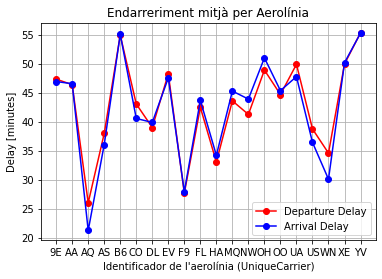

In [17]:
import matplotlib.pyplot as plt
fig5, ax5 = plt.subplots()
plt.plot(DD_mean.index, DD_mean['DepDelay'],'r-o')
plt.plot(AD_mean.index, AD_mean['ArrDelay'],'b-o')
plt.grid(); ax5.legend(['Departure Delay','Arrival Delay'])
ax5.set_title('Endarreriment mitjà per Aerolínia')
ax5.set_xlabel('Identificador de l\'aerolínia (UniqueCarrier)'); ax5.set_ylabel('Delay [minutes]');
plt.savefig('fig5_.png')

In [18]:
# EXERCICI 1.6 - Crear una visualització per més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

import pandas as pd
data_frame = pd.read_csv('DelayedFlights.csv')
g6 = data_frame[['UniqueCarrier','ArrDelay','DepDelay','AirTime']].dropna().groupby('UniqueCarrier')

In [19]:
# ArrDelay data
AD_mean = g6.ArrDelay.mean().to_frame()
AD_std = g6.ArrDelay.std().to_frame()
# DepDelay data
DD_mean = g6.DepDelay.mean().to_frame()
DD_std = g6.DepDelay.std().to_frame() 
# AirTime data
AT_mean = g6.AirTime.mean().to_frame()
AT_std = g6.AirTime.std().to_frame()

labels = AD_mean.index #són iguals per totes les dades.
amplada = 0.75 #de les barres del gràfic

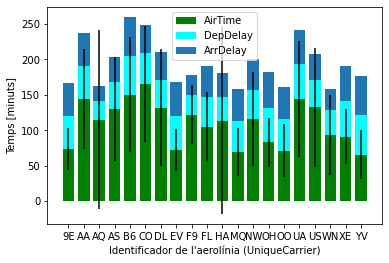

In [20]:
# stacked-bar chart
fig6, ax6 = plt.subplots()
ax6.bar(labels, AT_mean['AirTime'], amplada, yerr=AT_std['AirTime'], label='AirTime', color = 'green')
ax6.bar(labels, DD_mean['DepDelay'], amplada, bottom= AT_mean['AirTime'], label='DepDelay', color = 'cyan')
ax6.bar(labels, AD_mean['ArrDelay'], amplada, bottom= DD_mean['DepDelay']+AT_mean['AirTime'], label='ArrDelay')

# etiquetes i llegenda
ax6.legend()
ax6.set_xlabel('Identificador de l\'aerolínia (UniqueCarrier)')
ax6.set_ylabel('Temps [minuts]')

plt.savefig('fig6_.png')

##### S'observa que l'endarreriment en l'enlairement i l'aterratge són coherents amb els del gràfic anterior. Es mostra només la desviació estàndard de _AirTime_ perquè sinó es solapaven.